# Import libraries 

In [1]:
# import libraries for Association Rules
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# import libraries for data manipulation
import pandas as pd
import numpy as np
# set the style of the plots
plt.style.use('ggplot')

In [2]:
# load the dataset Titanic.csv
df = pd.read_csv('Titanic.csv')
df.head()

,Class,Gender,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Gender    2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


# Pre-Processing
For association rules mining we want the data to be in the form of transactions in each row and items in each column. We will use the get_dummies function to convert the data into this format. Each value in the column will indicate if that item was purchased in that transaction.

In [6]:
# one hot encode the features in the dataset
df=pd.get_dummies(df)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,0,0,1,0,0,1,0,1,1,0
1,0,0,1,0,0,1,0,1,1,0
2,0,0,1,0,0,1,0,1,1,0
3,0,0,1,0,0,1,0,1,1,0
4,0,0,1,0,0,1,0,1,1,0


In [8]:
# convert the values in the dataframe into boolean values
df = df.astype(bool)
df.head()

,Class_1st,Class_2nd,Class_3rd,Class_Crew,Gender_Female,Gender_Male,Age_Adult,Age_Child,Survived_No,Survived_Yes
0,False,False,True,False,False,True,False,True,True,False
1,False,False,True,False,False,True,False,True,True,False
2,False,False,True,False,False,True,False,True,True,False
3,False,False,True,False,False,True,False,True,True,False
4,False,False,True,False,False,True,False,True,True,False


# Apriori Algorithm 

In [9]:
# generate the frequent itemsets with a min support of 0.1 
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.147660,(Class_1st)
1,0.129487,(Class_2nd)
2,0.320763,(Class_3rd)
3,0.402090,(Class_Crew)
4,0.213539,(Gender_Female)
5,0.786461,(Gender_Male)
6,0.950477,(Age_Adult)
7,0.676965,(Survived_No)
8,0.323035,(Survived_Yes)
9,0.144934,"(Age_Adult, Class_1st)"


In [12]:
# generate association rules from the frequent itemsets based on min lift criteria
# of 0.7 and sort the rules in decreasing order of lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules.sort_values('lift', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
66,"(Gender_Female, Age_Adult)",(Survived_Yes),0.193094,0.323035,0.143571,0.743529,2.301699,0.081195,2.639542
67,(Survived_Yes),"(Gender_Female, Age_Adult)",0.323035,0.193094,0.143571,0.444444,2.301699,0.081195,1.452431
18,(Survived_Yes),(Gender_Female),0.323035,0.213539,0.156293,0.483826,2.265745,0.087312,1.523634
19,(Gender_Female),(Survived_Yes),0.213539,0.323035,0.156293,0.731915,2.265745,0.087312,2.525187
68,(Gender_Female),"(Survived_Yes, Age_Adult)",0.213539,0.297138,0.143571,0.672340,2.262724,0.080121,2.145099
...,...,...,...,...,...,...,...,...,...
4,(Gender_Male),(Class_3rd),0.786461,0.320763,0.231713,0.294627,0.918520,-0.020555,0.962947
79,"(Survived_No, Gender_Male, Age_Adult)",(Class_3rd),0.603816,0.320763,0.175829,0.291196,0.907823,-0.017853,0.958286
90,(Class_3rd),"(Survived_No, Gender_Male, Age_Adult)",0.320763,0.603816,0.175829,0.548159,0.907823,-0.017853,0.876820
29,"(Gender_Male, Age_Adult)",(Class_3rd),0.757383,0.320763,0.209905,0.277145,0.864016,-0.033036,0.939658


A lift of greater than 1 indicates that the itemset is more likely to be bought together than by chance. A lift of less than 1 indicates that the itemset is less likely to be bought together than by chance.

In [16]:
#filter the rules only for those with lift > 1
final_rules = rules[rules.lift>1]

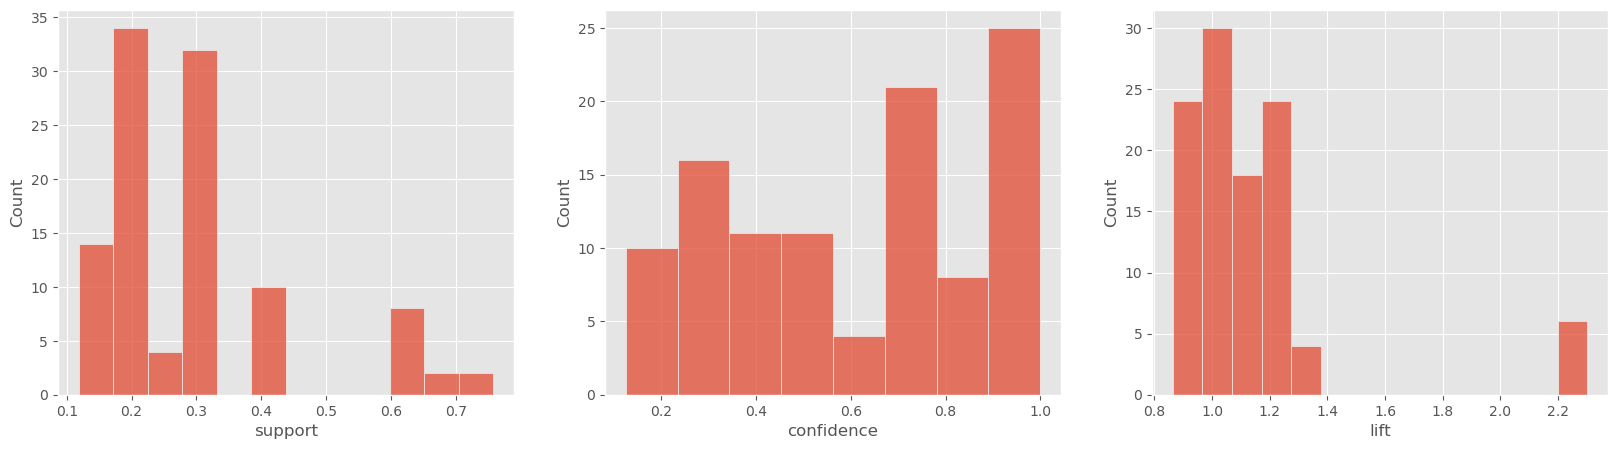

In [14]:
# check for the distribution of support, confidence and lift values for the rules
fig, ax = plt.subplots(1,3, figsize=(20,5))
sns.histplot(rules.support, ax=ax[0])
sns.histplot(rules.confidence, ax=ax[1])
sns.histplot(rules.lift, ax=ax[2]);

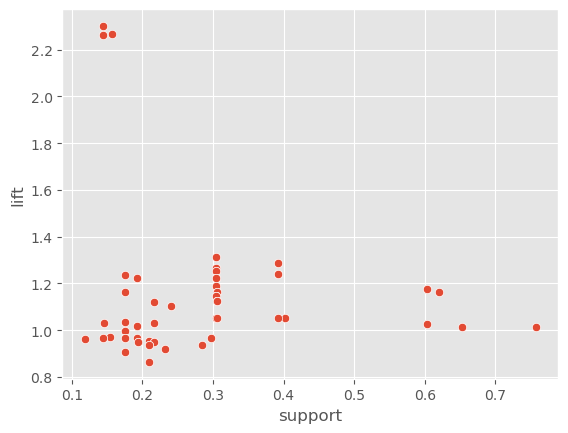

In [18]:
# plot scatter plot of support vs lift
sns.scatterplot(data=rules, x="support", y="lift");